<h1 style="background-color: #ffd5cd; text-align: center"> Extracting Financial 10-K Statements from SEC'S EDGAR Database</h1>

Este notebook está en desarrollo.

Lo que se ha realizado hasta ahora:

Extracción de entidades a partir de los documentos financieros.

Creación de un conjunto de datos financieros.

Análisis exploratorio de datos (EDA).


The Financial Statement and Notes Data Sets below provide the text and detailed numeric information from all financial statements and their notes.

The Financial Statement and Notes Data (PDF, 200 kb) provides documentation of scope, organization, file formats and table definitions.

https://www.sec.gov/data-research/sec-markets-data/financial-statement-notes-data-sets

The Financial Statement and Notes Data (PDF, 200 kb) provides documentation of scope, organization, file formats and table definitions:

https://www.sec.gov/files/dera/data/financial-statement-notes-data-sets/2025_02_notes.zip

In [3]:
# %conda init
# %conda deactivate
# %conda activate credit-analysis-dashboard
# %conda install numpy pandas requests bs4 tqdm openai matplotlib seaborn 
# %conda install -c conda-forge ratelimit lxml statsmodels 
# %conda install conda-forge::nltk

In [4]:
import numpy as np # linear algebra, arithmentic calculations
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os

<h1 style="background-color: #ffd5cd; text-align: center">Exploratory Data Analysis</h1>

In [5]:
!pip install scikit-learn


In [65]:
import requests
from zipfile import ZipFile, BadZipFile

# URL of the file
url = "https://www.sec.gov/files/dera/data/financial-statement-notes-data-sets/2025_02_notes.zip"
local_filename = "C:/Users/natal/credit-analysis-dashboard-v1/data/raw/2025_02_notes.zip"

# Download the file
headers = {
    "User-Agent": "YourName-YourAppName/1.0 (your-email@example.com)",  # Replace with your details
    "Accept-Encoding": "gzip, deflate",
    "Accept": "text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8",
    "Connection": "keep-alive",
    "Host": "www.sec.gov",  # Add the Host header
    "Referer": "https://www.sec.gov/",  # Add a Referer header
    "From": "natalia.a.stekolnikova@gmail.com"  # Replace with your email address
}
response = requests.get(url, headers=headers, stream=True)
if response.status_code == 200:
    with open(local_filename, "wb") as f:
        for chunk in response.iter_content(chunk_size=8192):
            f.write(chunk)
    print(f"Downloaded: {local_filename}")
else:
    print(f"Failed to download file. Status code: {response.status_code}")
    response.raise_for_status()

# Optional: Extract the zip
try:
    with ZipFile(local_filename, 'r') as zip_ref:
        zip_ref.extractall("C:/Users/natal/credit-analysis-dashboard-v1/data/raw/2025_02_notes")
        print("Extracted to C:/Users/natal/credit-analysis-dashboard-v1/data/raw/2025_02_notes/")
except BadZipFile:
    print("Error: The downloaded file is not a valid ZIP file.")

Downloaded: C:/Users/natal/credit-analysis-dashboard-v1/data/raw/2025_02_notes.zip
Extracted to C:/Users/natal/credit-analysis-dashboard-v1/data/raw/2025_02_notes/


In [49]:
DATA_INPUT_DIR = "C:/Users/natal/credit-analysis-dashboard-v1/data/raw/2025_02_notes/"

sub = pd.read_csv(os.path.join(DATA_INPUT_DIR, "sub.tsv"), sep='\t', low_memory=False)
num = pd.read_csv(os.path.join(DATA_INPUT_DIR, "num.tsv"), sep='\t', low_memory=False)
tag = pd.read_csv(os.path.join(DATA_INPUT_DIR, "tag.tsv"), sep='\t', low_memory=False)
cal = pd.read_csv(os.path.join(DATA_INPUT_DIR, "cal.tsv"), sep='\t', low_memory=False)
dim = pd.read_csv(os.path.join(DATA_INPUT_DIR, "dim.tsv"), sep='\t', low_memory=False)
pre = pd.read_csv(os.path.join(DATA_INPUT_DIR, "pre.tsv"), sep='\t', low_memory=False)
ren = pd.read_csv(os.path.join(DATA_INPUT_DIR, "ren.tsv"), sep='\t', low_memory=False)
txt = pd.read_csv(os.path.join(DATA_INPUT_DIR, "txt.tsv"), sep='\t', low_memory=False)

print("Files loaded successfully!")


Files loaded successfully!


In [83]:
sub.head(1).transpose()

,0
adsh,0000012927-25-000015
cik,12927
name,BOEING CO
sic,3721.0
countryba,US
stprba,VA
cityba,ARLINGTON
zipba,22202
bas1,929 LONG BRIDGE DRIVE
bas2,NaN


In [53]:
sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8863 entries, 0 to 8862
Data columns (total 40 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   adsh         8863 non-null   object 
 1   cik          8863 non-null   int64  
 2   name         8863 non-null   object 
 3   sic          8511 non-null   float64
 4   countryba    8847 non-null   object 
 5   stprba       8392 non-null   object 
 6   cityba       8846 non-null   object 
 7   zipba        8844 non-null   object 
 8   bas1         8847 non-null   object 
 9   bas2         3731 non-null   object 
 10  baph         8858 non-null   object 
 11  countryma    8845 non-null   object 
 12  stprma       8407 non-null   object 
 13  cityma       8844 non-null   object 
 14  zipma        8840 non-null   object 
 15  mas1         8841 non-null   object 
 16  mas2         3716 non-null   object 
 17  countryinc   7998 non-null   object 
 18  stprinc      7463 non-null   object 
 19  ein   

In [54]:
sub.describe()

,cik,sic,ein,changed,wksi,fye,period,fy,filed,prevrpt,detail,nciks,pubfloatusd,floatdate,floatmems
count,8.863000e+03,8511.000000,8.863000e+03,5.314000e+03,8863.000000,8820.000000,8.775000e+03,2754.000000,8.863000e+03,8863.000000,8863.000000,8863.000000,1.969000e+03,1.969000e+03,1969.000000
mean,1.272957e+06,4868.293033,4.484226e+08,2.007402e+07,0.168340,1117.708617,2.024705e+07,2024.189542,2.025022e+07,0.001015,0.322239,1.032607,1.423564e+13,2.024047e+07,1.028949
std,5.512420e+05,1983.978220,3.326608e+08,1.204545e+05,0.374189,257.746957,4.894141e+03,0.438378,8.195186e+00,0.031852,0.467360,0.281767,4.006685e+14,1.621164e+03,0.387397
min,1.800000e+03,100.000000,0.000000e+00,1.960020e+07,0.000000,120.000000,2.005123e+07,2018.000000,2.025020e+07,0.000000,0.000000,1.000000,0.000000e+00,2.020063e+07,1.000000
25%,9.218250e+05,3011.000000,1.606322e+08,1.998085e+07,0.000000,1231.000000,2.024123e+07,2024.000000,2.025021e+07,0.000000,0.000000,1.000000,6.866000e+08,2.024063e+07,1.000000
50%,1.408710e+06,4911.000000,4.118836e+08,2.010061e+07,0.000000,1231.000000,2.025013e+07,2024.000000,2.025022e+07,0.000000,0.000000,1.000000,2.300000e+09,2.024063e+07,1.000000
75%,1.710340e+06,6770.000000,8.137016e+08,2.018013e+07,0.000000,1231.000000,2.025023e+07,2024.000000,2.025022e+07,0.000000,1.000000,1.000000,8.200000e+09,2.024063e+07,1.000000
max,2.052961e+06,8900.000000,1.000000e+09,2.024122e+07,1.000000,1231.000000,2.025043e+07,2025.000000,2.025023e+07,1.000000,1.000000,8.000000,1.612464e+16,2.025013e+07,16.000000


In [57]:
num.head(2)

,adsh,tag,version,ddate,qtrs,uom,dimh,iprx,value,footnote,footlen,dimn,coreg,durp,datp,dcml
0,0000002488-25-000012,AccountsPayableCurrent,us-gaap/2024,20231231,0,USD,0x00000000,0,2.055000e+09,NaN,0,0,NaN,0.0,1.0,-6
1,0000002488-25-000012,AccountsPayableCurrent,us-gaap/2024,20241231,0,USD,0x00000000,0,1.990000e+09,NaN,0,0,NaN,0.0,3.0,-6


In [58]:
num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5068718 entries, 0 to 5068717
Data columns (total 16 columns):
 #   Column    Dtype  
---  ------    -----  
 0   adsh      object 
 1   tag       object 
 2   version   object 
 3   ddate     int64  
 4   qtrs      int64  
 5   uom       object 
 6   dimh      object 
 7   iprx      int64  
 8   value     float64
 9   footnote  object 
 10  footlen   int64  
 11  dimn      int64  
 12  coreg     object 
 13  durp      float64
 14  datp      float64
 15  dcml      int64  
dtypes: float64(3), int64(6), object(7)
memory usage: 618.7+ MB


In [60]:
num.describe()

,ddate,qtrs,iprx,value,footlen,dimn,durp,datp,dcml
count,5.068718e+06,5.068718e+06,5.068718e+06,5.003542e+06,5.068718e+06,5.068718e+06,5.068718e+06,5.068718e+06,5.068718e+06
mean,2.023428e+07,1.703154e+00,1.115010e-01,3.234493e+10,6.169426e-01,1.025176e+00,1.745428e-03,6.217154e-02,1.706087e+03
std,9.295193e+03,2.007115e+00,5.468252e-01,4.540973e+13,2.831589e+01,1.037582e+00,2.676112e-02,1.499532e+00,8.983557e+03
min,1.870123e+07,0.000000e+00,0.000000e+00,-2.412180e+13,0.000000e+00,0.000000e+00,-4.986300e-01,-1.500000e+01,-3.276800e+04
25%,2.023123e+07,0.000000e+00,0.000000e+00,1.310000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-6.000000e+00
50%,2.024013e+07,0.000000e+00,0.000000e+00,4.097000e+06,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,-3.000000e+00
75%,2.024123e+07,4.000000e+00,0.000000e+00,1.003970e+08,0.000000e+00,2.000000e+00,1.095891e-02,0.000000e+00,-3.000000e+00
max,2.074123e+07,1.360000e+02,5.900000e+01,1.000000e+17,2.679900e+04,9.000000e+00,4.986310e-01,1.500000e+01,3.276700e+04


In [61]:
tag.head(2)

,tag,version,custom,abstract,datatype,iord,crdr,tlabel,doc
0,A.5000EuroDenominatedNotesDue2033Member,0000059478-25-000067,1,1,member,NaN,NaN,.5000% Euro Denominated Notes Due 2033 [Member],.5000% Euro Denominated Notes Due 2033
1,A.C.SolucoesParaPiscinasLda.Member,0000945841-25-000032,1,1,member,NaN,NaN,"A.C. Solucoes para Piscinas, Lda. [Member]","A.C. Solucoes para Piscinas, Lda."


In [62]:
tag.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 514013 entries, 0 to 514012
Data columns (total 9 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   tag       514012 non-null  object
 1   version   514013 non-null  object
 2   custom    514013 non-null  int64 
 3   abstract  514013 non-null  int64 
 4   datatype  484269 non-null  object
 5   iord      277540 non-null  object
 6   crdr      153591 non-null  object
 7   tlabel    513950 non-null  object
 8   doc       477424 non-null  object
dtypes: int64(2), object(7)
memory usage: 35.3+ MB


In [63]:
tag.describe()

,custom,abstract
count,514013.000000,514013.000000
mean,0.957073,0.459994
std,0.202693,0.498397
min,0.000000,0.000000
25%,1.000000,0.000000
50%,1.000000,0.000000
75%,1.000000,1.000000
max,1.000000,1.000000


In [ ]:
# the tag dataset is NOT useful for our analysis

In [64]:
cal.head(2)

,adsh,grp,arc,negative,ptag,pversion,ctag,cversion
0,0001504461-25-000004,12,5,1,AccruedLiabilitiesCurrent,us-gaap/2023,TaxesPayableCurrent,us-gaap/2023
1,0000769520-25-000009,3,1,1,AccruedLiabilitiesCurrent,us-gaap/2023,ContractWithCustomerLiabilityCurrent,us-gaap/2023


In [65]:
cal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 477029 entries, 0 to 477028
Data columns (total 8 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   adsh      477029 non-null  object
 1   grp       477029 non-null  int64 
 2   arc       477029 non-null  int64 
 3   negative  477029 non-null  int64 
 4   ptag      477029 non-null  object
 5   pversion  477029 non-null  object
 6   ctag      477029 non-null  object
 7   cversion  477029 non-null  object
dtypes: int64(3), object(5)
memory usage: 29.1+ MB


In [66]:
cal.describe()

,grp,arc,negative
count,477029.000000,477029.000000,477029.000000
mean,10.292121,10.330552,0.613701
std,8.055472,9.858514,0.789540
min,1.000000,1.000000,-1.000000
25%,4.000000,3.000000,1.000000
50%,8.000000,7.000000,1.000000
75%,15.000000,15.000000,1.000000
max,66.000000,121.000000,1.000000


In [93]:
# the cal dataset could be useful if we need a mapping between previous tag and current tag
# but we don't need it for now

In [67]:
dim.head(2)

,dimhash,segments,segt
0,0x0942d94b9d9266bf273a2c5123d68019,BalanceSheetLocation=OtherAccruedLiabilities;D...,0
1,0xf48392632836a4db259a7d67c3a4f808,RangesOfExercisePricesForOutstandingShareOptio...,0


In [69]:
dim.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 417834 entries, 0 to 417833
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   dimhash   417834 non-null  object
 1   segments  417833 non-null  object
 2   segt      417834 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 9.6+ MB


In [70]:
dim.describe()

,segt
count,417834.0
mean,0.0
std,0.0
min,0.0
25%,0.0
50%,0.0
75%,0.0
max,0.0


In [ ]:
# the dim dataset is NOT useful for our analysis

In [71]:
pre.head(2)

,adsh,report,line,stmt,inpth,tag,version,prole,plabel,negating
0,0001104659-25-008644,1,2,NaN,0,AmendmentFlag,dei/2023,label,Amendment Flag,0
1,0000826154-25-000036,1,23,NaN,0,AmendmentFlag,dei/2023,terseLabel,Amendment Flag,0


In [72]:
pre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3218749 entries, 0 to 3218748
Data columns (total 10 columns):
 #   Column    Dtype 
---  ------    ----- 
 0   adsh      object
 1   report    int64 
 2   line      int64 
 3   stmt      object
 4   inpth     int64 
 5   tag       object
 6   version   object
 7   prole     object
 8   plabel    object
 9   negating  int64 
dtypes: int64(4), object(6)
memory usage: 245.6+ MB


In [ ]:
# the pre dataset is NOT useful for our analysis

In [74]:
ren.head(2)

,adsh,report,rfile,menucat,shortname,longname,roleuri,parentroleuri,parentreport,ultparentrpt
0,0001628280-25-003396,1,H,C,Cover,0000001 - Document - Cover,http://daveandbusters.com/role/Cover,NaN,NaN,NaN
1,0001493152-25-004617,1,H,C,Cover,00000001 - Document - Cover,http://fr8technologies.com/role/Cover,NaN,NaN,NaN


In [75]:
ren.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269397 entries, 0 to 269396
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   adsh           269397 non-null  object 
 1   report         269397 non-null  int64  
 2   rfile          269397 non-null  object 
 3   menucat        269397 non-null  object 
 4   shortname      269387 non-null  object 
 5   longname       269397 non-null  object 
 6   roleuri        269397 non-null  object 
 7   parentroleuri  73787 non-null   object 
 8   parentreport   73787 non-null   float64
 9   ultparentrpt   133446 non-null  float64
dtypes: float64(2), int64(1), object(7)
memory usage: 20.6+ MB


In [ ]:
# the ren dataset is NOT useful for our analysis

In [92]:
txt.tail(3)

,adsh,tag,version,ddate,qtrs,iprx,lang,dcml,durp,datp,dimh,dimn,coreg,escaped,srclen,txtlen,footnote,footlen,context,value
687063,0000950170-25-027735,CostOfSalesPolicyTextBlock,us-gaap/2024,20241231,4,0,en-US,32767,0.00000,0.0,0x00000000,0,NaN,1,1314,863,NaN,0,C_d00eba5b-9e9b-4cb5-ad83-340d13e32914,Cost of Goods Sold Cost of goods sold include...
687064,0000950170-25-026068,Rule10b51ArrAdoptedFlag,ecd/2024,20241231,1,0,en-US,32767,0.00274,0.0,0x00000000,0,NaN,0,5,5,NaN,0,C_73e6f1f4-c5e6-4a18-a838-d18e18736139,false
687065,0001932393-25-000005,DocumentFinStmtErrorCorrectionFlag,dei/2024,20241231,4,0,en-US,32767,0.00000,0.0,0x00000000,0,NaN,0,5,5,NaN,0,c-1,false


In [78]:
txt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 687066 entries, 0 to 687065
Data columns (total 20 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   adsh      687066 non-null  object 
 1   tag       687066 non-null  object 
 2   version   687066 non-null  object 
 3   ddate     687066 non-null  int64  
 4   qtrs      687066 non-null  int64  
 5   iprx      687066 non-null  int64  
 6   lang      687066 non-null  object 
 7   dcml      687066 non-null  int64  
 8   durp      687066 non-null  float64
 9   datp      687066 non-null  float64
 10  dimh      687066 non-null  object 
 11  dimn      687066 non-null  int64  
 12  coreg     7745 non-null    object 
 13  escaped   687066 non-null  int64  
 14  srclen    687066 non-null  int64  
 15  txtlen    687066 non-null  int64  
 16  footnote  464 non-null     object 
 17  footlen   687066 non-null  int64  
 18  context   687066 non-null  object 
 19  value     686021 non-null  object 
dtypes: f

In [ ]:
# the txt dataset can be useful for our analysis only if we want to extract some additional or specific Fields from a certain financial report.

In [96]:
# Let's start our analysis with the most useful sub and num datasets.
# the following sub columns could be useful for our analysis:
sub[['adsh', 'cik', 'name', 'countryba', 'stprba', 'cityba', 'accepted', 'instance', 'pubfloatusd', 'form', 'period', 'fy', 'fp', 'floatdate']].head(1)

,adsh,cik,name,countryba,stprba,cityba,accepted,instance,pubfloatusd,form,period,fy,fp,floatdate
0,0000012927-25-000015,12927,BOEING CO,US,VA,ARLINGTON,2025-02-03 14:38:00.0,ba-20241231_htm.xml,1.120000e+11,10-K,20241231.0,2024.0,FY,20240630.0


In [97]:
# the following num columns could be useful for our analysis:
num[['adsh', 'tag', 'version', 'ddate', 'qtrs', 'uom', 'dimh', 'iprx', 'footnote', 'footlen', 'dimn', 'coreg', 'durp', 'datp', 'dcml']].head(1)

,adsh,tag,version,ddate,qtrs,uom,dimh,iprx,footnote,footlen,dimn,coreg,durp,datp,dcml
0,0000002488-25-000012,AccountsPayableCurrent,us-gaap/2024,20231231,0,USD,0x00000000,0,NaN,0,0,NaN,0.0,1.0,-6


In [111]:
# Export the unique_tags array to a CSV file
output_path = "C:/Users/natal/credit-analysis-dashboard/data/processed/2025_02_notes/unique_tags.csv"
pd.DataFrame(unique_tags, columns=["Tag"]).to_csv(output_path, index=False, header=False)

print(f"Tags exported successfully to {output_path}")

Tags exported successfully to C:/Users/natal/credit-analysis-dashboard/data/processed/2025_02_notes/unique_tags.csv


#### Transformación

Transformación de los datos para:
- Poder llevar a cabo los puntos anteriores
- Para poder visualizar los datos con python
- Para poder juntar datos
  - Como hacer un join/merge en pandas
  - Como juntar datos extraídos por una API con un csv
  - Como juntar datos extraídos por web-scrapping con una API
  
Esta etapa puede realizarse con visualizaciones simples y descripciones estadísticas preliminares.

In [148]:
# Let's start our analysis with the most useful sub and num datasets.
# the following sub columns could be useful for our analysis:
# sub[['adsh', 'cik', 'name', 'countryba', 'stprba', 'cityba', 'accepted', 'instance', 'pubfloatusd', 'form', 'period', 'fy', 'fp', 'floatdate']].head(1)
# the following num columns could be useful for our analysis:
# num[['adsh', 'tag', 'version', 'ddate', 'qtrs', 'uom', 'dimh', 'iprx', 'footnote', 'footlen', 'dimn', 'coreg', 'durp', 'datp', 'dcml']].head(1)

key_tags = {
    'NetIncomeLoss': 'Net Income',
    'Assets': 'Total Assets',
    'StockholdersEquity': 'Shareholder Equity',
    'NetCashProvidedByUsedInOperatingActivities': 'Cash From Ops',
    'Revenues': 'Revenue',
    'AccountsReceivableNetCurrent': 'Accounts Receivable (Current)',
    'AccountsPayableCurrent': 'Accounts Payable (Current)',
    'AccruedLiabilitiesCurrent': 'Accrued Liabilities (Current)',
    'AccumulatedDepreciationDepletionAndAmortization': 'Accumulated Depreciation/Amortization',
    'AdditionalPaidInCapitalCommonStock': 'Additional Paid-in Capital',
    'AccruedIncomeTaxesNoncurrent': 'Accrued Income Taxes (Noncurrent)',
    'AmortizationOfIntangibleAssets': 'Amortization of Intangibles',
    'AllocatedShareBasedCompensationExpense': 'Share-based Compensation Expense'
}

num_filtered = num[num['tag'].isin(key_tags.keys())].copy()
num_filtered['metric_name'] = num_filtered['tag'].map(key_tags)
num_filtered = num_filtered.merge(sub[['adsh', 'cik', 'name', 'fy', 'fp', 'form']], on='adsh', how='left')

edf = num_filtered.pivot_table(
    index=['cik', 'name', 'adsh', 'fy', 'fp', 'form'],
    columns='metric_name',
    values='value',
    aggfunc='first'
).reset_index()

edf['ROE'] = edf['Net Income'] / edf['Shareholder Equity'].replace(0, np.nan)
edf['ROA'] = edf['Net Income'] / edf['Total Assets'].replace(0, np.nan)
edf['ROI'] = edf['Net Income'] / (edf['Total Assets'] - edf['Accounts Payable (Current)'])

edf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2716 entries, 0 to 2715
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   cik                                2716 non-null   int64  
 1   name                               2716 non-null   object 
 2   adsh                               2716 non-null   object 
 3   fy                                 2716 non-null   float64
 4   fp                                 2716 non-null   object 
 5   form                               2716 non-null   object 
 6   Accounts Payable (Current)         1669 non-null   float64
 7   Accounts Receivable (Current)      1501 non-null   float64
 8   Accrued Income Taxes (Noncurrent)  157 non-null    float64
 9   Accrued Liabilities (Current)      1031 non-null   float64
 10  Additional Paid-in Capital         1033 non-null   float64
 11  Amortization of Intangibles        1611 non-null   float

In [149]:
edf.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
metric_name,,,,,,,,
cik,2716.0,1.207000e+06,5.609254e+05,1.800000e+03,8.856912e+05,1.339177e+06,1.653521e+06,2.042694e+06
fy,2716.0,2.024189e+03,4.385243e-01,2.018000e+03,2.024000e+03,2.024000e+03,2.024000e+03,2.025000e+03
Accounts Payable (Current),1669.0,1.073121e+09,2.118590e+10,0.000000e+00,6.636000e+06,4.820400e+07,2.772010e+08,8.570000e+11
Accounts Receivable (Current),1501.0,7.799859e+08,2.804053e+09,-1.000000e+06,2.049400e+07,1.347350e+08,5.366500e+08,5.225300e+10
Accrued Income Taxes (Noncurrent),157.0,3.389381e+08,9.644950e+08,0.000000e+00,5.391000e+06,2.802400e+07,1.690000e+08,8.474000e+09
Accrued Liabilities (Current),1031.0,5.015765e+08,2.838483e+09,-6.000000e+05,1.031875e+07,6.169300e+07,2.653440e+08,6.470900e+10
Additional Paid-in Capital,1033.0,2.930092e+09,7.476783e+09,-3.637000e+08,3.214480e+08,9.445730e+08,2.381510e+09,1.145190e+11
Amortization of Intangibles,1611.0,1.026445e+08,4.542782e+08,-4.300000e+07,2.300000e+06,1.240000e+07,5.600000e+07,9.700000e+09
Cash From Ops,2567.0,9.608174e+08,4.359354e+09,-7.255858e+09,-5.147665e+05,1.008940e+08,5.308700e+08,1.071190e+11


In [160]:
# Guardar dataframe localmente
os.makedirs(os.path.dirname(output_path), exist_ok=True)
edf.to_csv(output_path, index=False)

print(f"Dataset limpio guardado en: {output_path}")

Dataset limpio guardado en: C:/Users/natal/credit-analysis-dashboard/data/processed/2025_02_notes/unique_tags.csv


In [161]:
# Aplicar limpieza al dataset original (edf)
edf_full_clean = edf.copy()

edf_full_clean.info()
edf_full_clean.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2716 entries, 0 to 2715
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   cik                                2716 non-null   int64  
 1   name                               2716 non-null   object 
 2   adsh                               2716 non-null   object 
 3   fy                                 2716 non-null   float64
 4   fp                                 2716 non-null   object 
 5   form                               2716 non-null   object 
 6   Accounts Payable (Current)         1669 non-null   float64
 7   Accounts Receivable (Current)      1501 non-null   float64
 8   Accrued Income Taxes (Noncurrent)  157 non-null    float64
 9   Accrued Liabilities (Current)      1031 non-null   float64
 10  Additional Paid-in Capital         1033 non-null   float64
 11  Amortization of Intangibles        1611 non-null   float

metric_name,cik,fy,Accounts Payable (Current),Accounts Receivable (Current),Accrued Income Taxes (Noncurrent),Accrued Liabilities (Current),Additional Paid-in Capital,Amortization of Intangibles,Cash From Ops,Net Income,Revenue,Share-based Compensation Expense,Shareholder Equity,Total Assets,ROE,ROA,ROI
count,2.716000e+03,2716.000000,1.669000e+03,1.501000e+03,1.570000e+02,1.031000e+03,1.033000e+03,1.611000e+03,2.567000e+03,2.471000e+03,1.228000e+03,1.859000e+03,2.435000e+03,2.709000e+03,2303.000000,2458.000000,1585.000000
mean,1.207000e+06,2024.188881,1.073121e+09,7.799859e+08,3.389381e+08,5.015765e+08,2.930092e+09,1.026445e+08,9.608174e+08,4.469782e+08,6.928019e+09,9.573487e+07,3.423049e+09,3.524389e+10,-23.051819,-2.380467,-0.096447
std,5.609254e+05,0.438524,2.118590e+10,2.804053e+09,9.644950e+08,2.838483e+09,7.476783e+09,4.542782e+08,4.359354e+09,2.664370e+09,2.586636e+10,9.003811e+08,1.338096e+10,3.001762e+11,1182.350385,68.203900,6.895934
min,1.800000e+03,2018.000000,0.000000e+00,-1.000000e+06,0.000000e+00,-6.000000e+05,-3.637000e+08,-4.300000e+07,-7.255858e+09,-2.275900e+10,-1.054000e+09,-2.635000e+08,-1.723300e+10,-1.700000e+07,-55814.491525,-3297.933333,-144.696970
25%,8.856912e+05,2024.000000,6.636000e+06,2.049400e+07,5.391000e+06,1.031875e+07,3.214480e+08,2.300000e+06,-5.147665e+05,-8.275490e+06,3.104800e+07,4.000000e+06,5.506850e+07,3.998250e+08,-0.113296,-0.045450,-0.071945
50%,1.339177e+06,2024.000000,4.820400e+07,1.347350e+08,2.802400e+07,6.169300e+07,9.445730e+08,1.240000e+07,1.008940e+08,2.520000e+07,6.800275e+08,1.700000e+07,6.450050e+08,2.406057e+09,0.040510,0.010606,0.012486
75%,1.653521e+06,2024.000000,2.772010e+08,5.366500e+08,1.690000e+08,2.653440e+08,2.381510e+09,5.600000e+07,5.308700e+08,2.695500e+08,3.938184e+09,4.816000e+07,2.313972e+09,1.010370e+10,0.160670,0.050684,0.068380
max,2.042694e+06,2025.000000,8.570000e+11,5.225300e+10,8.474000e+09,6.470900e+10,1.145190e+11,9.700000e+09,1.071190e+11,5.997200e+10,4.136800e+11,2.637900e+10,2.700660e+11,1.192822e+13,9492.125000,66.295682,92.952381


In [162]:
edf_full_clean.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
metric_name,,,,,,,,
cik,2716.0,1.207000e+06,5.609254e+05,1.800000e+03,8.856912e+05,1.339177e+06,1.653521e+06,2.042694e+06
fy,2716.0,2.024189e+03,4.385243e-01,2.018000e+03,2.024000e+03,2.024000e+03,2.024000e+03,2.025000e+03
Accounts Payable (Current),1669.0,1.073121e+09,2.118590e+10,0.000000e+00,6.636000e+06,4.820400e+07,2.772010e+08,8.570000e+11
Accounts Receivable (Current),1501.0,7.799859e+08,2.804053e+09,-1.000000e+06,2.049400e+07,1.347350e+08,5.366500e+08,5.225300e+10
Accrued Income Taxes (Noncurrent),157.0,3.389381e+08,9.644950e+08,0.000000e+00,5.391000e+06,2.802400e+07,1.690000e+08,8.474000e+09
Accrued Liabilities (Current),1031.0,5.015765e+08,2.838483e+09,-6.000000e+05,1.031875e+07,6.169300e+07,2.653440e+08,6.470900e+10
Additional Paid-in Capital,1033.0,2.930092e+09,7.476783e+09,-3.637000e+08,3.214480e+08,9.445730e+08,2.381510e+09,1.145190e+11
Amortization of Intangibles,1611.0,1.026445e+08,4.542782e+08,-4.300000e+07,2.300000e+06,1.240000e+07,5.600000e+07,9.700000e+09
Cash From Ops,2567.0,9.608174e+08,4.359354e+09,-7.255858e+09,-5.147665e+05,1.008940e+08,5.308700e+08,1.071190e+11


In [163]:
# Add key financial ratios
edf_full_clean['Current Ratio'] = edf_full_clean['Accounts Receivable (Current)'] / edf_full_clean['Accounts Payable (Current)']
edf_full_clean['Debt to Equity'] = (edf_full_clean['Total Assets'] - edf_full_clean['Shareholder Equity']) / edf_full_clean['Shareholder Equity']
edf_full_clean['Profit Margin'] = edf_full_clean['Net Income'] / edf_full_clean['Revenue']
edf_full_clean['Asset Turnover'] = edf_full_clean['Revenue'] / edf_full_clean['Total Assets']

# Set conditional risk classification
edf_full_clean['Financial Risk Flag'] = (
    (edf_full_clean['Current Ratio'] < 1) |
    (edf_full_clean['Debt to Equity'] > 2) |
    (edf_full_clean['ROE'] < 0) |
    (edf_full_clean['Profit Margin'] < 0) |
    edf_full_clean[['Current Ratio', 'Debt to Equity', 'ROE', 'Profit Margin']].isnull().any(axis=1)
)

# Assign risk category
edf_full_clean['Risk Category'] = edf_full_clean['Financial Risk Flag'].map({True: 'High Risk', False: 'Financially Healthy'})

# Group and analyze by report type
summary = edf_full_clean[['name', 'ROE', 'ROA', 'Current Ratio', 'Debt to Equity', 'Risk Category']].round(2)

# Show distribution by risk category
risk_dist = edf_full_clean['Risk Category'].value_counts()

# Display results
print("\n--- Financial Risk Distribution ---")
print(risk_dist)

print("\n--- List of non-Risky companies ---")
non_risky_summary = summary[summary['Risk Category'] == 'Financially Healthy'].head(10)
non_risky_summary



--- Financial Risk Distribution ---
Risk Category
High Risk              2594
Financially Healthy     122
Name: count, dtype: int64

--- List of non-Risky companies ---


metric_name,name,ROE,ROA,Current Ratio,Debt to Equity,Risk Category
25,ARTS WAY MANUFACTURING CO INC,0.02,0.01,1.52,1.19,Financially Healthy
41,BRISTOL MYERS SQUIBB CO,0.14,0.07,2.73,1.15,Financially Healthy
52,CHEMED CORP,0.40,0.17,2.83,1.31,Financially Healthy
67,CORNING INC /NY,0.11,0.04,1.07,1.55,Financially Healthy
69,"CRANE NXT, CO.",0.27,0.10,2.02,1.79,Financially Healthy
71,CTS CORP,0.13,0.08,1.81,0.60,Financially Healthy
84,FLOWSERVE CORP,0.10,0.04,1.61,1.47,Financially Healthy
88,EMERSON ELECTRIC CO,0.01,0.00,2.19,1.05,Financially Healthy
92,ESPEY MFG & ELECTRONICS CORP,0.05,0.03,1.77,0.58,Financially Healthy
114,TEGNA INC,0.25,0.09,5.43,1.78,Financially Healthy


C:\Users\natal\AppData\Local\Temp\ipykernel_19180\3835642383.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10_roe, x='name', y='ROE', palette='viridis')


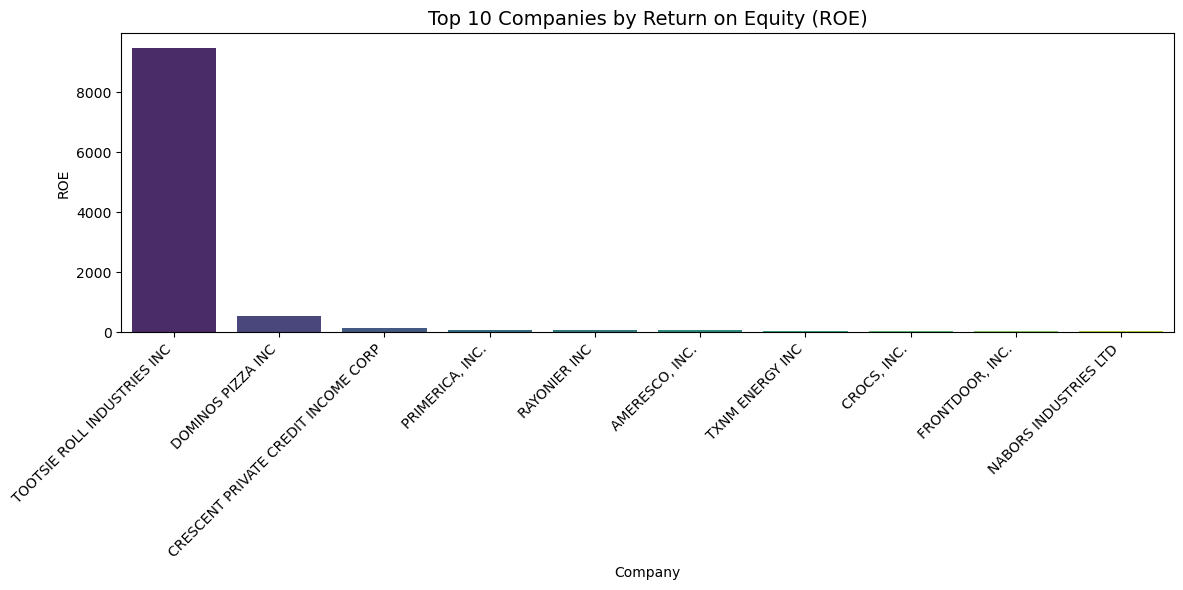

In [164]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter, drop NaNs, and select top 10 by ROE
top_10_roe = (
    edf_full_clean.dropna(subset=['ROE'])
    .sort_values(by='ROE', ascending=False)
    .head(10)
)

plt.figure(figsize=(12, 6))
sns.barplot(data=top_10_roe, x='name', y='ROE', palette='viridis')
plt.title('Top 10 Companies by Return on Equity (ROE)', fontsize=14)
plt.ylabel('ROE')
plt.xlabel('Company')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


C:\Users\natal\AppData\Local\Temp\ipykernel_19180\1332935610.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10_roe, x='name', y='ROE', palette='viridis')


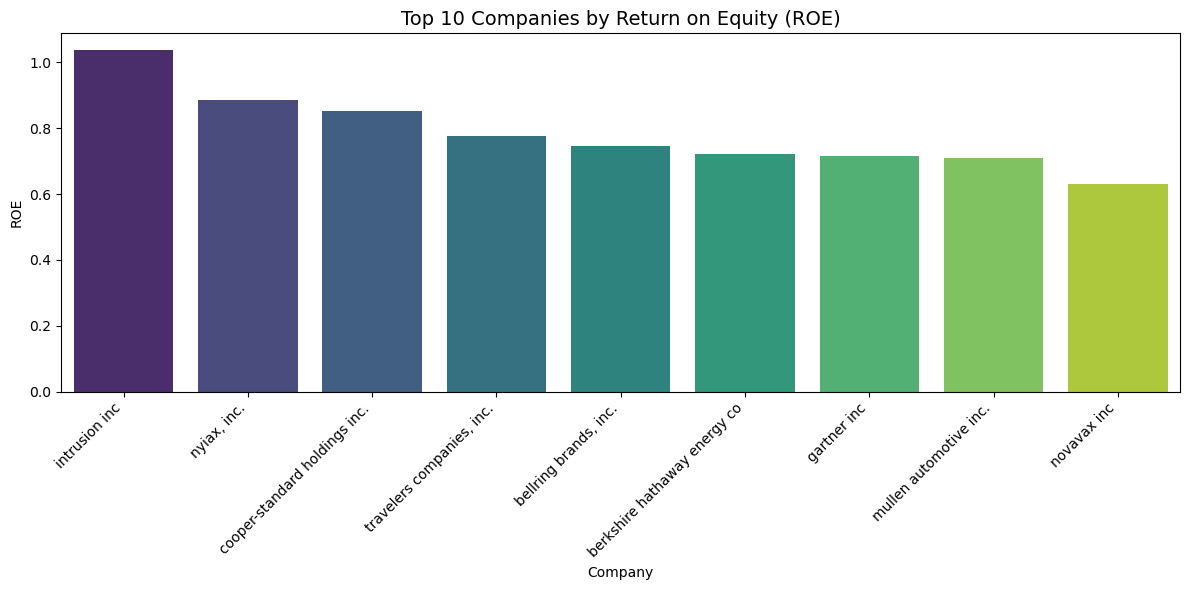

In [15]:
# --- Plot: Top 10 companies by ROE (excluding extreme outliers) ---
filtered_roe = edf_full_clean.dropna(subset=['ROE'])
filtered_roe = filtered_roe[filtered_roe['ROE'] < filtered_roe['ROE'].quantile(0.99)]
top_10_roe = filtered_roe.sort_values(by='ROE', ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(data=top_10_roe, x='name', y='ROE', palette='viridis')
plt.title('Top 10 Companies by Return on Equity (ROE)', fontsize=14)
plt.ylabel('ROE')
plt.xlabel('Company')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

C:\Users\natal\AppData\Local\Temp\ipykernel_19180\3439107295.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10_roi, x='name', y='ROI', palette='mako')


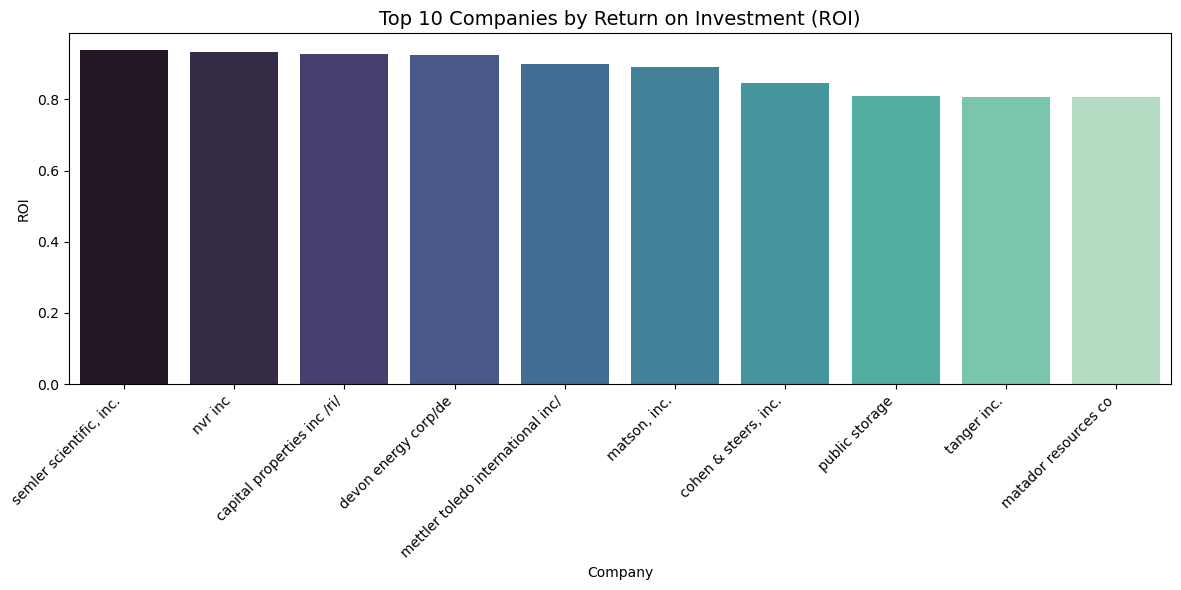

In [16]:
# --- Plot: Top 10 companies by ROI (excluding extreme outliers) ---
filtered_roi = edf_full_clean.dropna(subset=['ROI'])
top_10_roi = filtered_roi.sort_values(by='ROI', ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(data=top_10_roi, x='name', y='ROI', palette='mako')
plt.title('Top 10 Companies by Return on Investment (ROI)', fontsize=14)
plt.ylabel('ROI')
plt.xlabel('Company')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

C:\Users\natal\AppData\Local\Temp\ipykernel_19180\851940896.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10_roi, x='name', y='ROI', palette='mako')


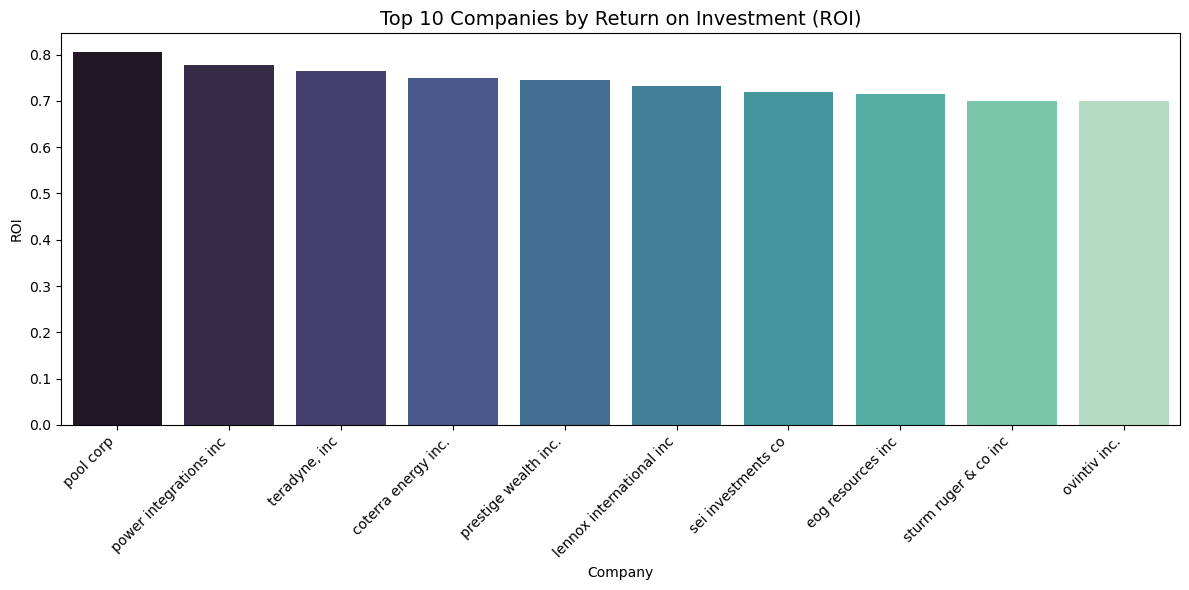

In [17]:
# --- Plot: Top 10 companies by ROI (excluding extreme outliers) ---
filtered_roi = edf_full_clean.dropna(subset=['ROI'])
filtered_roi = filtered_roi[filtered_roi['ROI'] < filtered_roi['ROI'].quantile(0.99)]
top_10_roi = filtered_roi.sort_values(by='ROI', ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(data=top_10_roi, x='name', y='ROI', palette='mako')
plt.title('Top 10 Companies by Return on Investment (ROI)', fontsize=14)
plt.ylabel('ROI')
plt.xlabel('Company')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#### Estadística

Una vez que comprendemos la estructura básica de los datos, debemos aplicar medidas estadísticas para describir su comportamiento y distribución. Esto incluye:

##### Descriptiva
- Estadísticas de tendencia central: media, mediana, moda
- Medidas de dispersión: rango, varianza, desviación estándar, percentiles
- Distribuciones: histograma, boxplot, KDE
- Estadísticas por subgrupos (segmentación por género, edad, región, etc.)

  
##### Inferencial
- Correlaciones entre variables numéricas
- Contraste de hipótesis: por ejemplo, ¿es diferente la edad del segmento A a la del B?
- Plantear modelo de regresión lineal sobre una variable dependiente en función del resto de datos (por ejemplo  precio de vivienda en función de m2 o numero de habitaciones)
- Unos resultados no-concluyentes, no confirmatorios con la pregunta de investigación inicial o con una muestra muy pequeña son igualmente necesarios siempre que se expliciten las limitaciones. Aunque tengas pocos datos: intenta plantear igualmente estos análisis.

Estas métricas permiten detectar patrones, comportamientos anómalos, y relaciones entre variables que pueden ser clave para responder a las preguntas de investigación.

In [18]:
import matplotlib.pyplot as plt  # Importing matplotlib.pyplot for plotting
import seaborn as sns  # Ensure seaborn is also imported for visualization

# --- Estadística Descriptiva ---
print("\nEstadísticas descriptivas básicas:")

# Calcular estadísticas descriptivas principales
desc_stats = edf_full_clean[['Net Income', 'Revenue', 'ROE', 'ROA']].describe().T.copy()

# Agregar mediana y moda
desc_stats['mediana'] = edf_full_clean[['Net Income', 'Revenue', 'ROE', 'ROA']].median()
desc_stats['moda'] = edf_full_clean[['Net Income', 'Revenue', 'ROE', 'ROA']].mode().iloc[0]
desc_stats['rango'] = desc_stats['max'] - desc_stats['min']
desc_stats['varianza'] = edf_full_clean[['Net Income', 'Revenue', 'ROE', 'ROA']].var()

# Renombrar columnas al español
desc_stats = desc_stats.rename(columns={
    'mean': 'media',
    'std': 'desviación estándar',
    'min': 'mínimo',
    '25%': 'percentil 25',
    '50%': 'percentil 50',
    '75%': 'percentil 75',
    'max': 'máximo'
})

# Seleccionar columnas para mostrar
columnas_a_mostrar = ['media', 'mediana', 'moda', 'desviación estándar', 'mínimo', 'máximo',
                      'percentil 25', 'percentil 50', 'percentil 75']

# Transponer para forma "pivot" legible
# --- a. Estadísticas de tendencia central ---
tendencia_central = desc_stats[['media', 'mediana', 'moda']].T
tendencia_central.columns.name = "Métrica"

# --- b. Medidas de dispersión ---
dispersión = desc_stats[['mínimo', 'máximo', 'rango', 'varianza', 'desviación estándar',
                         'percentil 25', 'percentil 50', 'percentil 75']].T
dispersión.columns.name = "Métrica"

print("\nMedidas de tendencia central:")
print(tendencia_central)

print("\nMedidas de dispersión:")
print(dispersión)


Estadísticas descriptivas básicas:

Medidas de tendencia central:
Métrica  Net Income       Revenue       ROE           ROA
media      0.000000 -3.085962e-17  0.000000  3.085962e-17
mediana   -0.303983 -3.952654e-01  0.113266  2.018284e-01
moda      -0.364944 -4.678227e-01  0.095179  1.654441e-01

Medidas de dispersión:
Métrica              Net Income   Revenue        ROE       ROA
mínimo                -2.032678 -0.467823 -12.293247 -9.032707
máximo                 8.332612  6.924701   3.463886  0.938369
rango                 10.365289  7.392524  15.757134  9.971076
varianza               1.001087  1.001087   1.001087  1.001087
desviación estándar    1.000543  1.000543   1.000543  1.000543
percentil 25          -0.365904 -0.462852   0.086918  0.128887
percentil 50          -0.303983 -0.395265   0.113266  0.201828
percentil 75          -0.032418 -0.057631   0.143179  0.299392


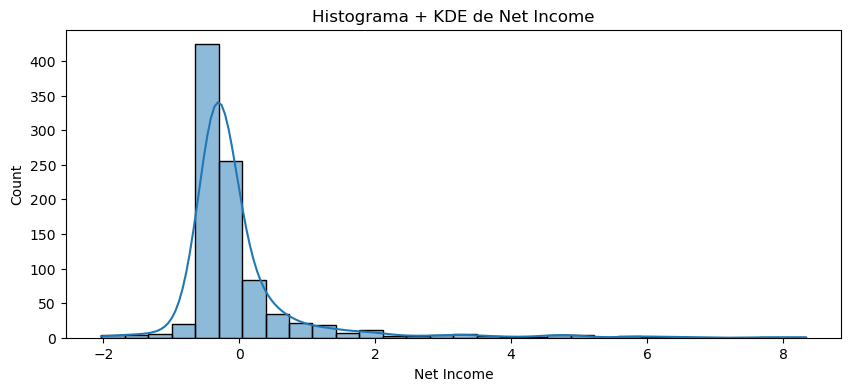

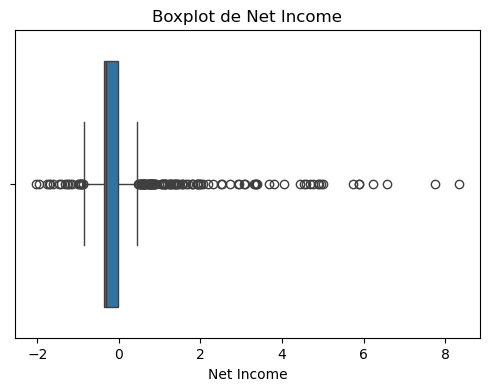

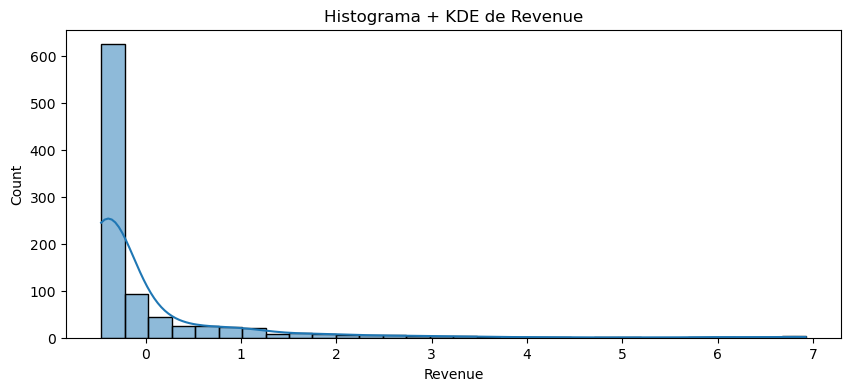

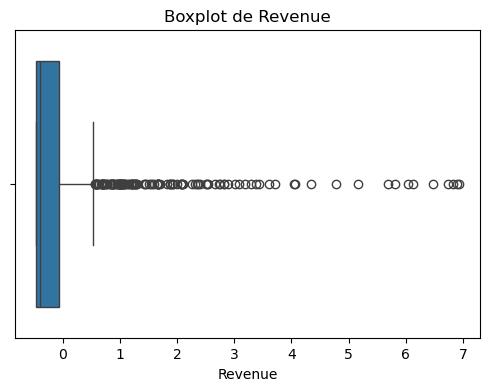

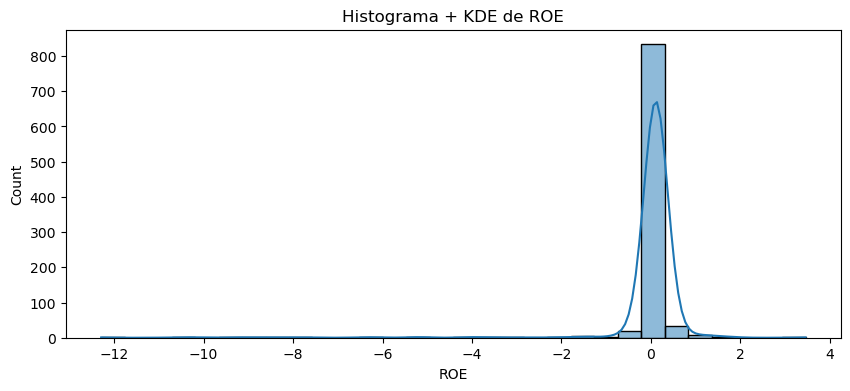

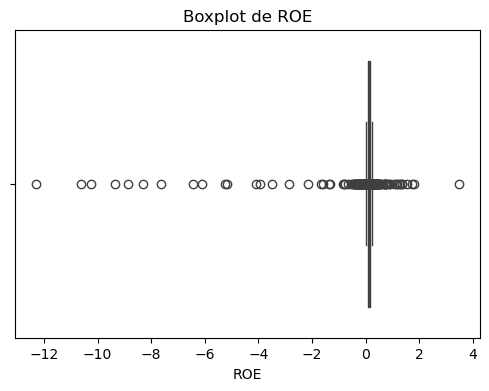

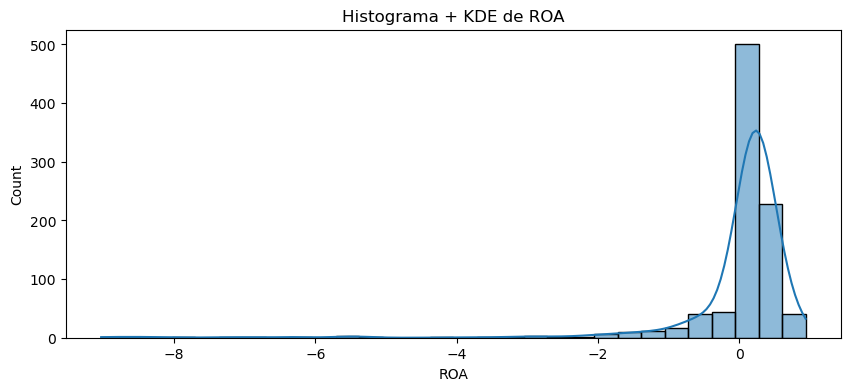

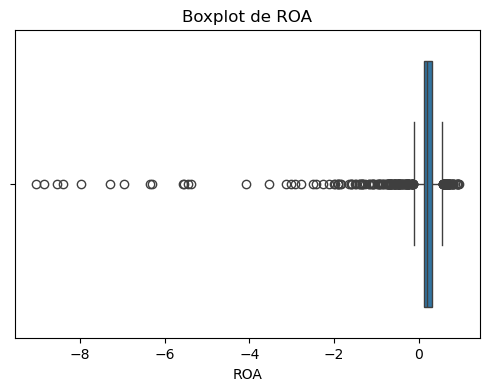


Correlaciones entre métricas financieras:
metric_name  Net Income   Revenue       ROE       ROA
metric_name                                          
Net Income     1.000000  0.563140 -0.009522  0.167461
Revenue        0.563140  1.000000 -0.005128  0.139464
ROE           -0.009522 -0.005128  1.000000 -0.000691
ROA            0.167461  0.139464 -0.000691  1.000000


In [19]:
# --- Histograma y Boxplot ---
for metric in ['Net Income', 'Revenue', 'ROE', 'ROA']:
    plt.figure(figsize=(10, 4))
    sns.histplot(edf_full_clean[metric].dropna(), kde=True, bins=30)
    plt.title(f'Histograma + KDE de {metric}')
    plt.show()

    plt.figure(figsize=(6, 4))
    sns.boxplot(x=edf_full_clean[metric].dropna())
    plt.title(f'Boxplot de {metric}')
    plt.show()

# --- Correlaciones 
print("\nCorrelaciones entre métricas financieras:")
print(edf_full_clean[['Net Income', 'Revenue', 'ROE', 'ROA']].corr())

Contraste de hipótesis: por ejemplo, ¿es diferente la edad del segmento A a la del B?

In [67]:
# --- Hypothesis Test: Is ROA different between companies filing 10-K and 10-Q forms? ---

# Import necessary libraries
from scipy.stats import ttest_ind
from IPython.display import display, Markdown

# Filter the DataFrame to keep only records with 10-K and 10-Q forms and valid ROA values
filtered_df = edf_full_clean[edf_full_clean['form'].isin(['10-K', '10-Q'])].dropna(subset=['ROA'])

# Separate the data into two groups based on the type of form
roa_10k = filtered_df[filtered_df['form'] == '10-K']['ROA']
roa_10q = filtered_df[filtered_df['form'] == '10-Q']['ROA']

# Apply Welch's t-test (does not assume equal variances)
t_stat, p_value = ttest_ind(roa_10k, roa_10q, equal_var=False)

# Calculate the mean ROA for each group
mean_10k = roa_10k.mean()
mean_10q = roa_10q.mean()

# Create a Markdown table to present the results with explanations in Spanish
markdown_table = """
### Results of the t-test

| Indicator         | Value               | Interpretation |
|-------------------|---------------------|----------------|
| t-statistic       | `{:.2f}`            | t-test statistic: measures the difference between means. The larger the value, the greater the difference. |
| p-value           | `{:.2e}` (≈ `{:.7f}`) | A very low value → indicates that the difference is statistically significant (compared to 0.05 or 0.01). |
| mean_10k          | `{:.3f}`            | Average ROA for companies filing annual forms (10-K) |
| mean_10q          | `{:.3f}`            | Average ROA for companies filing quarterly forms (10-Q) |
""".format(t_stat, p_value, p_value, mean_10k, mean_10q)

# Display the table
display(Markdown(markdown_table))



### Results of the t-test

| Indicator         | Value               | Interpretation |
|-------------------|---------------------|----------------|
| t-statistic       | `4.48`            | t-test statistic: measures the difference between means. The larger the value, the greater the difference. |
| p-value           | `1.22e-05` (≈ `0.0000122`) | A very low value → indicates that the difference is statistically significant (compared to 0.05 or 0.01). |
| mean_10k          | `0.133`            | Average ROA for companies filing annual forms (10-K) |
| mean_10q          | `-0.400`            | Average ROA for companies filing quarterly forms (10-Q) |


In [68]:
# --- Linear Regression Model ---

import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from IPython.display import display, Markdown

# 1. Filter the DataFrame for necessary variables and remove null values
df_model = edf_full_clean[['ROI', 'Net Income', 'Revenue', 'Cash From Ops', 'Total Assets', 'Shareholder Equity', 'form', 'fp']].dropna()

# 2. Remove extreme outliers in ROI (e.g., outside the range -2 to 2)
df_model = df_model[(df_model['ROI'] > -2) & (df_model['ROI'] < 2)]

# 3. Apply logarithmic transformation to some numerical variables (use +1 to handle zeros or negatives)
for col in ['Net Income', 'Revenue', 'Cash From Ops', 'Total Assets', 'Shareholder Equity']:
    df_model[f'log_{col}'] = np.log(df_model[col].abs() + 1)

# 4. Encode categorical variables 'form' and 'fp' as dummy variables (one-hot encoding)
df_model = pd.get_dummies(df_model, columns=['form', 'fp'], drop_first=True)

# 5. Select predictor variables (all transformed + dummy variables)
X_cols = [col for col in df_model.columns if col.startswith('log_') or col.startswith('form_') or col.startswith('fp_')]
X = df_model[X_cols]
y = df_model['ROI']

# 6. Standardize the predictor variables
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = sm.add_constant(X_scaled)  # Add constant

# 7. Create the linear regression model
model = sm.OLS(y, X_scaled).fit()

# 8. Extract significant variables (p < 0.05)
significant_vars = []
for i, pval in enumerate(model.pvalues):
    if pval < 0.05 and i != 0:  # i=0 is the constant
        significant_vars.append(f"x{i}")

# Map variable names to their actual column names
mapped_vars = dict(zip([f"x{i}" for i in range(1, X.shape[1] + 1)], X.columns))
significant_named = [mapped_vars[x] for x in significant_vars]

# 9. Display a structured summary of the model
markdown_summary = f"""
### Linear Regression Model Summary

| Indicator                         | Value                                  |
|----------------------------------|----------------------------------------|
| R² (coefficient of determination)  | `{model.rsquared:.3f}` → explains approximately {model.rsquared * 100:.1f}% of the variation in ROI |
| p-value of the model (F-statistic) | `{model.f_pvalue:.2e}` → the model is {"statistically significant" if model.f_pvalue < 0.05 else "not significant"} |
| Significant variables (p < 0.05)   | {", ".join(f"`{v}`" for v in significant_named) if significant_named else "None"} |
| Standardization                    | Applied (`StandardScaler`)            |
| Categorical variables (dummy)      | `form`, `fp` — converted to dummy variables |
"""

display(Markdown(markdown_summary))



### Linear Regression Model Summary

| Indicator                         | Value                                  |
|----------------------------------|----------------------------------------|
| R² (coefficient of determination)  | `0.092` → explains approximately 9.2% of the variation in ROI |
| p-value of the model (F-statistic) | `1.43e-11` → the model is statistically significant |
| Significant variables (p < 0.05)   | `log_Revenue`, `form_10-Q`, `form_10-Q/A`, `fp_Q2`, `fp_Q3` |
| Standardization                    | Applied (`StandardScaler`)            |
| Categorical variables (dummy)      | `form`, `fp` — converted to dummy variables |


In [70]:
# --- Non-conclusive results or results that do not confirm the initial research question 
# or are based on a very small sample are still necessary as long as the limitations are explicitly stated ---

import pandas as pd
import statsmodels.api as sm
from IPython.display import display, Markdown

# 1. Filter the data
model_data = edf_full_clean.dropna(subset=['ROE', 'Net Income', 'Revenue'])
X = model_data[['Net Income', 'Revenue']]
y = model_data['ROE']
X = sm.add_constant(X)

# 2. Train the model
model = sm.OLS(y, X).fit()

# 3. Extract key metrics
r2 = model.rsquared
p_val_model = model.f_pvalue
coef_net_income = model.params['Net Income']
coef_revenue = model.params['Revenue']
pval_net_income = model.pvalues['Net Income']
pval_revenue = model.pvalues['Revenue']

# 4. Create a tabulated summary
markdown_tabla = f"""
### Linear Regression Model Summary

| Indicator                              | Value                                                         |
|----------------------------------------|---------------------------------------------------------------|
| R² (coefficient of determination)      | `{r2:.3f}` → the model {"does not " if r2 < 0.01 else ""}explain approximately {r2*100:.1f}% of the variation in ROE |
| p-value of the model (F-statistic)     | `{p_val_model:.2e}` → the model is {"statistically significant" if p_val_model < 0.05 else "not significant"} |
| Coefficient for Net Income             | `{coef_net_income:.4f}`, p = `{pval_net_income:.3f}`          |
| Coefficient for Revenue                | `{coef_revenue:.4f}`, p = `{pval_revenue:.3f}`                |
| Significant variables (p < 0.05)       | {", ".join(f"`{v}`" for v in ['Net Income', 'Revenue'] if model.pvalues[v] < 0.05) or "None"} |
"""

# 5. Display the summary
display(Markdown(markdown_tabla))



### Linear Regression Model Summary

| Indicator                              | Value                                                         |
|----------------------------------------|---------------------------------------------------------------|
| R² (coefficient of determination)      | `0.000` → the model does not explain approximately 0.0% of the variation in ROE |
| p-value of the model (F-statistic)     | `9.59e-01` → the model is not significant |
| Coefficient for Net Income             | `-0.0097`, p = `0.808`          |
| Coefficient for Revenue                | `0.0003`, p = `0.993`                |
| Significant variables (p < 0.05)       | None |


In [28]:
# --- Modelo de regresión lineal: ROE ~ Net Income, Revenue ---

#import statsmodels.api as sm

#model_data = edf_full_clean.dropna(subset=['ROE', 'Net Income', 'Revenue'])
#X = model_data[['Net Income', 'Revenue']]
#y = model_data['ROE']
#X = sm.add_constant(X)
#model = sm.OLS(y, X).fit()
#print("\nResumen del modelo de regresión lineal (ROE ~ Net Income + Revenue):")
#print(model.summary())


Resumen del modelo de regresión lineal (ROE ~ Net Income + Revenue):
                            OLS Regression Results                            
Dep. Variable:                    ROE   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                   0.04165
Date:                Fri, 04 Apr 2025   Prob (F-statistic):              0.959
Time:                        20:33:42   Log-Likelihood:                -1306.8
No. Observations:                 921   AIC:                             2620.
Df Residuals:                     918   BIC:                             2634.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------

The reason your regression output is filled with nan and inf is likely due to extreme values (outliers) or multicollinearity / numerical instability in the variables, especially Net Income and Revenue.

In [44]:
edf_full_clean.describe()
edf_full_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 921 entries, 4 to 2710
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   cik                 921 non-null    float64
 1   name                921 non-null    object 
 2   adsh                921 non-null    object 
 3   fy                  921 non-null    float64
 4   fp                  921 non-null    object 
 5   form                921 non-null    object 
 6   Cash From Ops       921 non-null    float64
 7   Net Income          921 non-null    float64
 8   Revenue             921 non-null    float64
 9   Shareholder Equity  921 non-null    float64
 10  Total Assets        921 non-null    float64
 11  ROE                 921 non-null    float64
 12  ROA                 921 non-null    float64
 13  ROI                 921 non-null    float64
dtypes: float64(10), object(4)
memory usage: 107.9+ KB


In [45]:

model_data = edf_full_clean[['ROE', 'Net Income', 'Revenue']].copy()

# Remove outliers using quantiles
q_low = model_data.quantile(0.01)
q_high = model_data.quantile(0.99)
model_data = model_data[(model_data >= q_low) & (model_data <= q_high)]

# --- Replace inf/-inf and drop remaining NaNs ---
model_data = model_data.replace([np.inf, -np.inf], np.nan).dropna()

# --- Log transformation ---
model_data['log_ni'] = np.log1p(model_data['Net Income'])
model_data['log_rev'] = np.log1p(model_data['Revenue'])


c:\Users\natal\anaconda3\envs\credit-analysis-dashboard\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [48]:
import numpy as np

# Remove rows with NaN or infinite values in X or y
X = model_data[['log_ni', 'log_rev']]
y = model_data['ROE']
X = sm.add_constant(X)

# Drop rows with NaN or infinite values
mask = np.isfinite(X).all(axis=1) & np.isfinite(y)
X = X[mask]
y = y[mask]

# Fit the model
model = sm.OLS(y, X).fit()
print("\nResumen del modelo de regresión lineal (ROE ~ log(Net Income) + log(Revenue)):")
print(model.summary())



Resumen del modelo de regresión lineal (ROE ~ log(Net Income) + log(Revenue)):
                            OLS Regression Results                            
Dep. Variable:                    ROE   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     3.277
Date:                Fri, 04 Apr 2025   Prob (F-statistic):             0.0382
Time:                        21:00:38   Log-Likelihood:                -338.90
No. Observations:                 871   AIC:                             683.8
Df Residuals:                     868   BIC:                             698.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------